In [2]:
#work with algorithm watershed
import cv2
import numpy as np
img = cv2.imread('000000.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', gray)
## Applying dilation for sure_bg detection
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
## Defining kernel for opening operation
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
cv2.imshow('Open', opening)
## After opening, will perform dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)
## Sure background image
cv2.imshow('dilated', sure_bg)

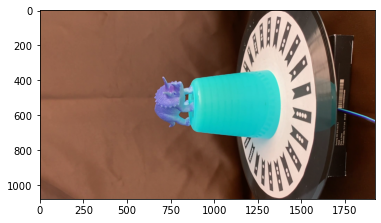

In [30]:
plt.imshow(img)

In [31]:
contornos, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
buracos = []
for con in contornos:
  area = cv2.contourArea(con)
  if area < 1000:
    buracos.append(con)
cv2.drawContours(thresh, buracos, -1, 255, -1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [32]:
dist = ndi.distance_transform_edt(thresh)
dist_visual = dist.copy()

In [33]:
local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)

C:\Users\555\AppData\Local\Temp/ipykernel_3788/1469441586.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(dist, indices=False, min_distance=20, labels=thresh)


In [34]:
markers = ndi.label(local_max, structure=np.ones((3, 3)))[0]

In [35]:
labels = watershed(-dist, markers, mask=thresh)

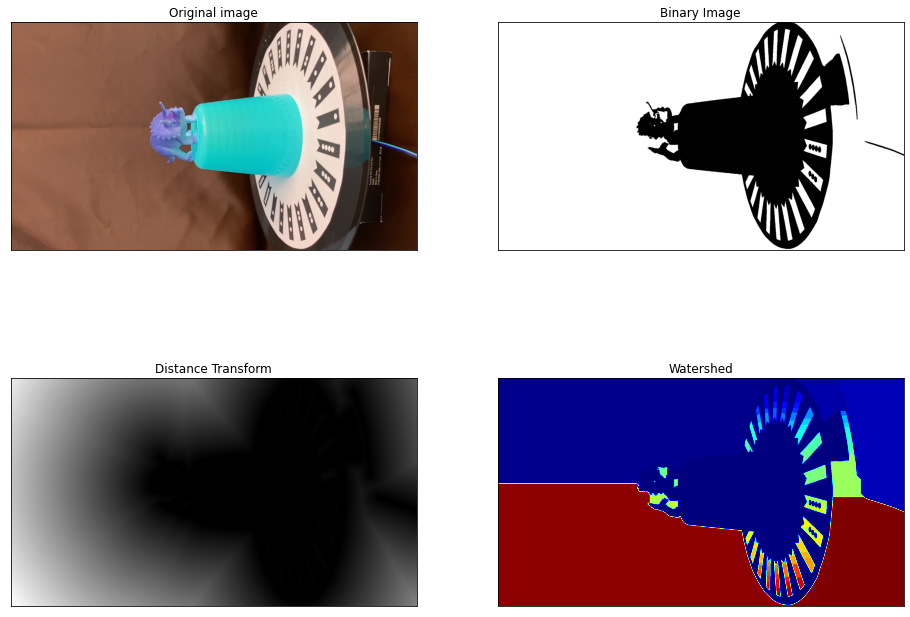

In [36]:
titulos = ['Original image', 'Binary Image', 'Distance Transform', 'Watershed']
imagens = [img, thresh, dist_visual, labels]
fig = plt.gcf()
fig.set_size_inches(16, 12)  
for i in range(4):
    plt.subplot(2,2,i+1)
    if (i == 3):
      cmap = "jet"
    else:
       cmap = "gray"
    plt.imshow(imagens[i], cmap)
    plt.title(titulos[i]) 
    plt.xticks([]),plt.yticks([])     
plt.show()

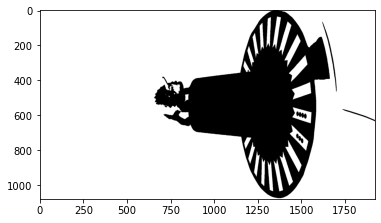

In [40]:
plt.imshow(thresh, cmap="gray")